In [1]:
# importing the required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# loading the pre-processed dataset
df = pd.read_csv(r'C:\Users\acer\Dropbox\PC\Downloads\processed_data.csv')

In [2]:
# displaying the dataset
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_total_karma,post_score,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,total_comments,self_text_tokens,post_title_tokens
0,j5a0v9a,2,mean like we brazil,volunteersforukraine,2023-01-21 14:03:55,10064ir,IndianVideoTutorial,0,2,0,...,3993.0,63,hunt wagner pmc abroad,0.84,63,0,2022-12-31 23:08:01,19,"['mean', 'like', 'us', 'brazil']","['hunting', 'wagner', 'pmc', 'abroad']"
1,j2ly1jd,3,awar shellshockptsd physiolog respons oneoff e...,volunteersforukraine,2023-01-02 08:11:37,1011g43,[deleted],0,3,0,...,0.0,365,combat vet word warn want actual go,0.89,365,0,2023-01-02 02:59:30,143,"['aware', 'shellshockptsd', 'physiological', '...","['combat', 'vet', 'words', 'warning', 'want', ..."
2,j2s31nk,2,keep pressur russia nearli exchang nuclear wea...,volunteersforukraine,2023-01-03 15:51:16,1011g43,david5669,0,2,0,...,85.0,365,combat vet word warn want actual go,0.89,365,0,2023-01-02 02:59:30,143,"['kept', 'pressure', 'russia', 'nearly', 'exch...","['combat', 'vet', 'words', 'warning', 'want', ..."
3,j2mqjbv,5,think ukrain need wife big shot banker kid tee...,volunteersforukraine,2023-01-02 14:02:54,1011g43,GuaranteeWide7607,0,5,0,...,1878.0,365,combat vet word warn want actual go,0.89,365,0,2023-01-02 02:59:30,143,"['think', 'ukraine', 'needs', 'wife', 'big', '...","['combat', 'vet', 'words', 'warning', 'want', ..."
4,j2m5cyl,20,humanitarian vs militari help season humanitar...,volunteersforukraine,2023-01-02 09:51:10,1011g43,vipassana-newbie,0,20,0,...,154216.0,365,combat vet word warn want actual go,0.89,365,0,2023-01-02 02:59:30,143,"['humanitarian', 'vs', 'military', 'helping', ...","['combat', 'vet', 'words', 'warning', 'want', ..."


In [3]:
# replacing NaN values with empty strings in 'post_title' and 'self_text' columns
df['post_title'].fillna('', inplace=True)
df['self_text'].fillna('', inplace=True)

In [4]:
# combining text from multiple columns into a single Series
combined_text = df['self_text'] + df['post_title']

# replacing NaN values with an empty string
combined_text_cleaned = combined_text.fillna('')

In [5]:
combined_text_cleaned

0                 mean like we brazilhunt wagner pmc abroad
1         awar shellshockptsd physiolog respons oneoff e...
2         keep pressur russia nearli exchang nuclear wea...
3         think ukrain need wife big shot banker kid tee...
4         humanitarian vs militari help season humanitar...
                                ...                        
162109    glamor realist normal peoplfind inform volunt ...
162110    go militari former militari militari experi ei...
162111    thank case peopl realli care dm sinc inexperie...
162112    wtf dude full shit need passport travel get uk...
162113    need ask problemat resum includ abil develop c...
Length: 162114, dtype: object

In [6]:
# creating a TF-IDF vectorizer
import scipy.sparse
tfidf_vectorizer = TfidfVectorizer()

In [8]:
# fitting the vectorizer to the documents and transforming them into TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text_cleaned)

# getting feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [9]:
# function to get the top 10 words for each document
def get_top_words(matrix_row, feature_names, top_n=7):
    sorted_indices = matrix_row.argsort()[::-1]
    top_words_indices = sorted_indices[:top_n]
    top_words = [feature_names[i] for i in top_words_indices]
    return top_words

In [10]:
# getting the top 10 words for each document
top_words_per_doc = [get_top_words(row.toarray().flatten(), feature_names, top_n=7) for row in tfidf_matrix]

In [11]:
# creating a column named top_words_per_doc in the dataset to store word frequencies
df['top_words_per_doc'] = top_words_per_doc

In [12]:
# downloading the resulting dataset
df.to_csv('tfidf_dataset.csv', index=False)

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# combining 'post_title' and 'self_text' into a single column 'combined_text'
df['combined_text'] = df['post_title'] + ' ' + df['self_text']

# extracting the combined text column 'combined_text' from the dataframe and convert it into a list of documents
documents = df['combined_text'].tolist()

# initializing a CountVectorizer object
vectorizer = CountVectorizer()

# fitting the CountVectorizer on the list of combined text documents and transforming them into a bag of words matrix representation
bow_matrix = vectorizer.fit_transform(documents)

# retrieving the vocabulary (dictionary) from the CountVectorizer
vocab = vectorizer.get_feature_names_out()

# printing the size of the vocabulary and shape of the bag of words matrix
print("Vocabulary size:", len(vocab))
print("First 10 words in vocabulary:", vocab[:10])
print("BoW matrix shape:", bow_matrix.shape)

Vocabulary size: 86045
First 10 words in vocabulary: ['00' '000' '0000' '0000000000000000000000000000000001'
 '000000000000000001' '00000000000001' '0000000000001' '000000001'
 '00000036' '000001']
BoW matrix shape: (162114, 86045)


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models 
import gensim 

# converting the bag of words matrix into a Gensim-compatible corpus
corpus_gensim = gensim.matutils.Sparse2Corpus(bow_matrix, documents_columns=False)

# training the LDA model using the Gensim corpus
lda_model = models.LdaModel(corpus_gensim, num_topics=7, id2word=dict((v, k) for k, v in vectorizer.vocabulary_.items()), passes=15)

# printing the topics generated by the LDA model
for idx, topic in lda_model.print_topics(-1):
    print('Topic:{}\nWords:{}'.format(idx, topic))

Topic:0
Words:0.054*"ukrain" + 0.049*"nato" + 0.020*"send" + 0.015*"nuclear" + 0.015*"eu" + 0.015*"germani" + 0.014*"poland" + 0.013*"countri" + 0.012*"franc" + 0.012*"macron"
Topic:1
Words:0.037*"de" + 0.031*"navalni" + 0.027*"le" + 0.018*"la" + 0.014*"en" + 0.011*"un" + 0.011*"et" + 0.011*"que" + 0.011*"pa" + 0.009*"pour"
Topic:2
Words:0.051*"russian" + 0.033*"ukrainian" + 0.029*"soldier" + 0.028*"drone" + 0.012*"get" + 0.011*"hit" + 0.010*"video" + 0.010*"tank" + 0.009*"see" + 0.009*"avdiivka"
Topic:3
Words:0.039*"russia" + 0.015*"gt" + 0.015*"china" + 0.013*"use" + 0.010*"sanction" + 0.010*"product" + 0.009*"buy" + 0.009*"north" + 0.008*"sell" + 0.008*"ga"
Topic:4
Words:0.026*"russia" + 0.025*"ukrain" + 0.015*"war" + 0.014*"would" + 0.013*"putin" + 0.012*"say" + 0.009*"like" + 0.008*"go" + 0.008*"get" + 0.007*"think"
Topic:5
Words:0.039*"russian" + 0.017*"peopl" + 0.009*"ukrainian" + 0.008*"putin" + 0.007*"like" + 0.006*"man" + 0.006*"kill" + 0.006*"moscow" + 0.006*"get" + 0.006*"s

In [18]:
# transforming the dataset documents into bag-of-words
bow_docs = vectorizer.transform(df['combined_text'])

# converting the bag of words matrix into a Gensim-compatible corpus
corpus_gensim_docs = gensim.matutils.Sparse2Corpus(bow_docs, documents_columns=False)

# inferring topic distributions for each document
doc_topic_distributions = lda_model[corpus_gensim_docs]

# assigning the most probable topic to each document
topics_assigned = [max(probabilities, key=lambda x: x[1])[0] for probabilities in doc_topic_distributions]

In [19]:
df['assigned_topic'] = topics_assigned

In [20]:
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,total_comments,self_text_tokens,post_title_tokens,top_words_per_doc,combined_text,assigned_topic
0,j5a0v9a,2,mean like we brazil,volunteersforukraine,2023-01-21 14:03:55,10064ir,IndianVideoTutorial,0,2,0,...,0.84,63,0,2022-12-31 23:08:01,19,"['mean', 'like', 'us', 'brazil']","['hunting', 'wagner', 'pmc', 'abroad']","[brazilhunt, pmc, abroad, wagner, mean, we, like]",hunt wagner pmc abroad mean like we brazil,6
1,j2ly1jd,3,awar shellshockptsd physiolog respons oneoff e...,volunteersforukraine,2023-01-02 08:11:37,1011g43,[deleted],0,3,0,...,0.89,365,0,2023-01-02 02:59:30,143,"['aware', 'shellshockptsd', 'physiological', '...","['combat', 'vet', 'words', 'warning', 'want', ...","[shellshockptsd, exacerbatori, fightcombat, ph...",combat vet word warn want actual go awar shell...,4
2,j2s31nk,2,keep pressur russia nearli exchang nuclear wea...,volunteersforukraine,2023-01-03 15:51:16,1011g43,david5669,0,2,0,...,0.89,365,0,2023-01-02 02:59:30,143,"['kept', 'pressure', 'russia', 'nearly', 'exch...","['combat', 'vet', 'words', 'warning', 'want', ...","[ussrcombat, vet, trust, exchang, nearli, pres...",combat vet word warn want actual go keep press...,4
3,j2mqjbv,5,think ukrain need wife big shot banker kid tee...,volunteersforukraine,2023-01-02 14:02:54,1011g43,GuaranteeWide7607,0,5,0,...,0.89,365,0,2023-01-02 02:59:30,143,"['think', 'ukraine', 'needs', 'wife', 'big', '...","['combat', 'vet', 'words', 'warning', 'want', ...","[go, toy, get, old, hospit, referbish, rashli]",combat vet word warn want actual go think ukra...,4
4,j2m5cyl,20,humanitarian vs militari help season humanitar...,volunteersforukraine,2023-01-02 09:51:10,1011g43,vipassana-newbie,0,20,0,...,0.89,365,0,2023-01-02 02:59:30,143,"['humanitarian', 'vs', 'military', 'helping', ...","['combat', 'vet', 'words', 'warning', 'want', ...","[humanitarian, warcombat, psychologist, ptsd, ...",combat vet word warn want actual go humanitari...,4


In [21]:
# mapping the dominant topics to their desirable titles
topic_titles = {
    0: "NATO-Russia Relations and Border Disputes",
    1: "Political Figures and Movements",
    2: "Technology and Military Operations",
    3: "Economic Relations and Sanctions",
    4: "Conflict Dynamics and Leadership",
    5: "Social Impacts and Perspectives",
    6: "Combat and Warfare Operations"
}

# adding a new column to the DataFrame with the mapped topic titles
df['Topics'] = [topic_titles[topic] if topic is not None else None for topic in topics_assigned]

In [22]:
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,post_thumbs_ups,post_total_awards_received,post_created_time,total_comments,self_text_tokens,post_title_tokens,top_words_per_doc,combined_text,assigned_topic,Topics
0,j5a0v9a,2,mean like we brazil,volunteersforukraine,2023-01-21 14:03:55,10064ir,IndianVideoTutorial,0,2,0,...,63,0,2022-12-31 23:08:01,19,"['mean', 'like', 'us', 'brazil']","['hunting', 'wagner', 'pmc', 'abroad']","[brazilhunt, pmc, abroad, wagner, mean, we, like]",hunt wagner pmc abroad mean like we brazil,6,Combat and Warfare Operations
1,j2ly1jd,3,awar shellshockptsd physiolog respons oneoff e...,volunteersforukraine,2023-01-02 08:11:37,1011g43,[deleted],0,3,0,...,365,0,2023-01-02 02:59:30,143,"['aware', 'shellshockptsd', 'physiological', '...","['combat', 'vet', 'words', 'warning', 'want', ...","[shellshockptsd, exacerbatori, fightcombat, ph...",combat vet word warn want actual go awar shell...,4,Conflict Dynamics and Leadership
2,j2s31nk,2,keep pressur russia nearli exchang nuclear wea...,volunteersforukraine,2023-01-03 15:51:16,1011g43,david5669,0,2,0,...,365,0,2023-01-02 02:59:30,143,"['kept', 'pressure', 'russia', 'nearly', 'exch...","['combat', 'vet', 'words', 'warning', 'want', ...","[ussrcombat, vet, trust, exchang, nearli, pres...",combat vet word warn want actual go keep press...,4,Conflict Dynamics and Leadership
3,j2mqjbv,5,think ukrain need wife big shot banker kid tee...,volunteersforukraine,2023-01-02 14:02:54,1011g43,GuaranteeWide7607,0,5,0,...,365,0,2023-01-02 02:59:30,143,"['think', 'ukraine', 'needs', 'wife', 'big', '...","['combat', 'vet', 'words', 'warning', 'want', ...","[go, toy, get, old, hospit, referbish, rashli]",combat vet word warn want actual go think ukra...,4,Conflict Dynamics and Leadership
4,j2m5cyl,20,humanitarian vs militari help season humanitar...,volunteersforukraine,2023-01-02 09:51:10,1011g43,vipassana-newbie,0,20,0,...,365,0,2023-01-02 02:59:30,143,"['humanitarian', 'vs', 'military', 'helping', ...","['combat', 'vet', 'words', 'warning', 'want', ...","[humanitarian, warcombat, psychologist, ptsd, ...",combat vet word warn want actual go humanitari...,4,Conflict Dynamics and Leadership


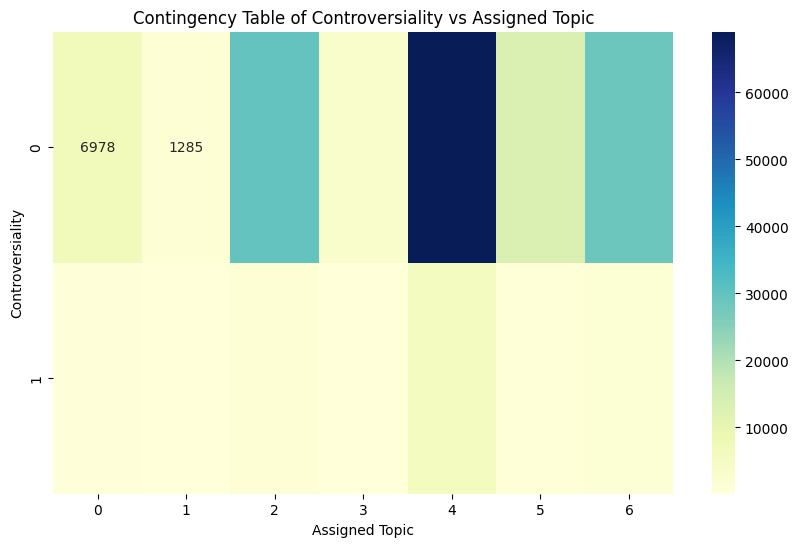

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'controversiality' and 'assigned_topic' columns
# and 'assigned_topic' is categorical
selected_columns = ['controversiality', 'assigned_topic']
data = df[selected_columns]

# Create a contingency table
contingency_table = pd.crosstab(data['controversiality'], data['assigned_topic'])

# Plot the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Assigned Topic')
plt.ylabel('Controversiality')
plt.title('Contingency Table of Controversiality vs Assigned Topic')
plt.show()

In [24]:
# downloading the resulting dataset
df.to_csv('tfidf_dataset.csv', index=False)